# Modelling  - <span style="color: blue">Optional extension work</span>

Here are a few more exercises for you to look at if you finish early or are keen enough to do some further study in your own time.

Start by running the code in the cell below to import some useful modules and set up some variables.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

beta = 0.017
rho = 2048**(1/6)
r0=4.0

def V(r):
    beta = 0.017
    rho = 2048**(1/6)
    return 4.0*beta*((rho/r)**12-(rho/r)**6)

## Analytical solution for the Young's Modulus with simple spring bonds


Above, we were dealing with a relatively complex form of the potential function $V(r)$ for the energy of the bonds in our crystal. We then implemented and algorithm within Python to find the equilibrium atom configuration and used this code to simulate the behaviour of the system under small deformations. Here we will take a different approach: we will use a simpler form for $V(r)$ and find an analytical form for the restoring force and Young's Modulus.

We will assume that our atomic bonds are represented by simple springs that behave according to Hooke's law, so that the energy of a spring (bond) will be:

$$V(r) = \frac{1}{2}k(r-r_0)^2,$$

where $r$ is the length of the spring (bond) and $k$ is the spring constant. 

Now the total energy $E$ of this model material will be:

$$E 
= \sum_{i=1}^{N-1} n_{\mathrm{layer}} \frac{1}{2}k \big[(x_{i}-x_{i-1})-r_0\big]^2,$$

where $n_{\mathrm{layer}}$ is the number of atoms in each layer and $(x_{i}-x_{i-1})$ is the bond length of the bonds to the left of layer $i$. If the bonds are all the same strength, then the layers will be evenly distributed over the length $L$ of the chain and we can write:

$$x_i = i\frac{L}{N-1}.$$

Hence the energy of the block will be:

$$ E = \sum_{i=1}^{N-1} n_{\mathrm{layer}}\frac{1}{2}k \bigg[\bigg( i\frac{L}{N-1} - (i-1)\frac{L}{N-1} \bigg) - r_0 \bigg]^2 = \sum_{i=1}^{N-1} \frac{1}{2}\frac{Ak}{r_0^2} \bigg[\frac{L}{N-1} - r_0 \bigg]^2 .$$


Now, notice that each term in this sum is independent of $i$ (the terms in $i$ cancelled out above). Hence we can rewrite the above as:

$$ E = \frac{1}{2}\frac{Ak}{r_0^2} \bigg[\frac{L}{N-1} - r_0 \bigg]^2 \sum_{i=1}^{N-1} 1 = \frac{1}{2}\frac{Ak}{r_0^2} \bigg[\frac{L}{N-1} - r_0 \bigg]^2 (N-1) .$$

Now, $(N-1) r_0 = L_0$, the equilibrium length of our block when the force $F=0$. Hence we have:

$$ E = \frac{1}{2}\frac{Ak}{(N-1)r_0^2}\, \left[{L - L_0}\right]^2.$$

So the energy of our whole block made up of lots of atoms and springs is just what we would expect for a single spring with a spring constant of $(A/(N-1)r_0^2)k$. The *atomic scale* properties $k$ and $r_0$ of the individual bonds  are manifesting themselves in *macroscopic* behaviour.

So far we have been thinking in terms of the energy of our system. We have done this because energy is a more useful concept than force in this sort of analysis. However, we are often more familiar with notions of force, not least because it tends to be forces, rather than energies, that we measure in the lab and sense in our everyday lives. So let's think first about the macroscopic force $F$ exerted on our atomic block in order to stretch it by an amount $L-L_0$. This is given by the derivative of the energy with respect to length:

$$ F = \frac{\mathrm{d}E}{\mathrm{d}L} = \frac{1}{2}\frac{Ak}{(N-1)r_0^2} \frac{\mathrm{d}}{\mathrm{d}L} \big[( L-L_0 )^2 \big] = \frac{Ak}{(N-1)r_0^2}\, ( L-L_0 ).$$

So, once again, the macroscopic forces are dependent on our atomic bond parameter $k$. We can now rearrange this expression to obtain a formula for the Young's modulus in terms of the atomic scale properties.
$$
\sigma = \frac{F}{A} = \frac{k}{(N-1) r_0^2}\, ( L-L_0 ) = \frac{k}{r_0}\, \frac{L-L_0}{L_0} = \frac{k}{r_0}\,\epsilon
\qquad \Rightarrow \qquad Y = \frac{k}{r_0}.
$$

The Young's modulus depends on how densely our atoms are packed and how strong (or more correctly, how stiff) the interatomic bonds are. We'll use the above result again in a minute when we return to studying the Lennard-Jones potential via something called a Taylor series approximation.

## Approximating the interatomic potential - Taylor series 

We obtained our estimate for $Y$ above via a numerical approximation to the derivative of the total energy of the block of atoms. We will now use something called the *Taylor series approximation* to find a value for $Y$ in a different way. We'll come back to this in a little while, but first let's define the Taylor series and explore it a little with python.

### The Taylor series

Let's start with the formal definition: 

<blockquote>The Taylor series of a function $f(x)$ that is infinitely differentiable at $a$ is the power series:

$$
\sum_{n=0}^{\infty}\frac{1}{n!}\frac{\mathrm{d}^nf}{\mathrm{d}x^n}\bigg|_{x=a}(x-a)^n
= f(a) 
+ \frac{1}{1!}\frac{\mathrm{d}f}{\mathrm{d}x}\bigg|_{x=a}(x-a) 
+ \frac{1}{2!}\frac{\mathrm{d}^2f}{\mathrm{d}x^2}\bigg|_{x=a}(x-a)^2
+ \frac{1}{3!}\frac{\mathrm{d}^3f}{\mathrm{d}x^3}\bigg|_{x=a}(x-a)^3
+ \dots
$$

where

$$ \frac{\mathrm{d}^nf}{\mathrm{d}x^n}\bigg|_{x=a} $$

is the $n^{\mathrm{th}}$ derivative of $f(x)$ with respect to $x$ evaluated at $x=a$.
</blockquote>

This will make much more sense if you give it a try:

### <span style="color: red"> Task:</span> Derive the Taylor series for $e^x$
Show that the Taylor series for $e^x$ about $x=0$ is:

$$ \sum_{n=0}^{\infty} \frac{x^n}{n!} $$

### <span style="color: blue"> Solution:</span>

Now let's use python to explore this Taylor series for $e^x$ a little.

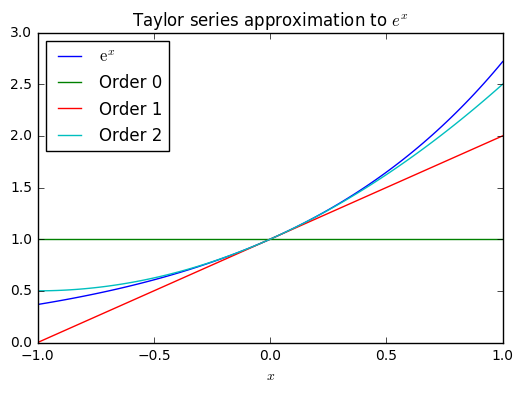

In [5]:
import math
import numpy as np
def taylor(x,N): # N is the order of the approximation to be calculated by the function
    f = 0.0
    for n in range(N+1):
        f = f + x**n / math.factorial(n)
    return f

x = np.linspace(-1.0,1.0,100)
plt.plot(x,np.exp(x),label='$\mathrm{e}^x$')
plt.plot(x,taylor(x,0),label='Order 0')
plt.plot(x,taylor(x,1),label='Order 1')
plt.plot(x,taylor(x,2),label='Order 2')
plt.xlabel('$x$')
plt.ylabel('')
plt.title('Taylor series approximation to $e^x$');
plt.legend(ncol=1, loc=2)

### <span style="color: red"> Task:</span> Explore the Taylor series for $\sin(x)$
Let's take a look at another example. The Taylor series for $\sin(x)$ is:

$$ \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{(2n+1)!}.$$

Write some python code to calculate this series to order $N$ and plot the results for different values of $N$ (just as we did above for the series for $e^x$.

Your plot will something like this:
<figure>
<img src="Figures/Plot5.jpg" width='200'>
<figcaption></figcaption>
</figure>

### <span style="color: blue"> Solution:</span>

### Relationship to Young's Modulus for Lennard-Jones block

Earlier on we used an approximate numerical calculation of the constant of proportionality $\alpha$ for the Lennard-Jones potential to find the Young's modulus for the block of material. We will now calculate an analytical approximation using the Taylor series approximation. First, let's calculate the terms of the Taylor series for the Lennard-Jones potential:


$$ V(r) = 4 \beta \bigg[ \bigg(\frac{\rho}{r}\bigg)^{12}-\bigg(\frac{\rho}{r}\bigg)^{6}\bigg], \qquad
\frac{\mathrm{d}V}{\mathrm{d}r} = \frac{4\beta}{\rho} \bigg[-12 \bigg(\frac{\rho}{r}\bigg)^{13}+6\bigg(\frac{\rho}{r}\bigg)^{7}\bigg], \qquad
\frac{\mathrm{d}^2V}{\mathrm{d}r^2} = \frac{4\beta}{\rho^2} \bigg[12(13) \bigg(\frac{\rho}{r}\bigg)^{14}-6(7)\bigg(\frac{\rho}{r}\bigg)^{8}\bigg]
$$

$$
\frac{\mathrm{d}^nV}{\mathrm{d}r^n} =
\frac{4\beta}{\rho^n} \bigg[ \frac{(-1)^n(11+n)!}{11!}\bigg(\frac{\rho}{r}\bigg)^{12+n}-\frac{(-1)^n(5+n)!}{5!}\bigg(\frac{\rho}{r}\bigg)^{6+n}\bigg]
$$

so,

$$
V(r) = \sum_{n=0}^{\infty} \frac{1}{n!}\frac{4\beta}{\rho^n}\Bigg[ \frac{(-1)^n(11+n)!}{11!}\bigg(\frac{\rho}{r}\bigg)^{12+n}\bigg|_{r=r_0}-\frac{(-1)^n(5+n)!}{5!}\bigg(\frac{\rho}{r}\bigg)^{6+n}\bigg|_{r=r_0} \Bigg] (r-r_0)^n.
$$

The terms are messy, but straight forward. Now let's explore this series in Python as before:

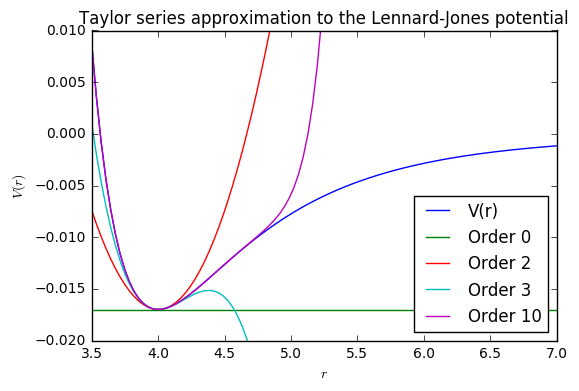

In [6]:
import math
import numpy as np

def taylor(x,N):
    f = 0.0
    for n in range(N+1):
        term =  (-1)**n*math.factorial(11+n)/math.factorial(11)*(rho/r0)**(12+n)
        term = term - (-1)**n*math.factorial(5+n)/math.factorial(5)*(rho/r0)**(6+n)
        term = term * 1.0/math.factorial(n)
        term = term * 4.0*beta/rho**n
        term = term * (x-r0)**n
        f = f + term
    return f

r = np.linspace(3.5,7.0,100)  
plt.plot(r,V(r),label='V(r)')
plt.plot(r,taylor(r,0),label='Order 0')
plt.plot(r,taylor(r,2),label='Order 2')
plt.plot(r,taylor(r,3),label='Order 3')
plt.plot(r,taylor(r,10),label='Order 10')
plt.xlabel('$r$')
plt.ylabel('$V(r)$')
plt.ylim((-0.02,0.01))
plt.title('Taylor series approximation to the Lennard-Jones potential');
plt.legend(ncol=1, loc=4)

As we increase the order of the approximation we get a better representation of the true potential over a wider range of $r$. It may have occurred to you that each term in the Taylor series for the Lennard-Jones potential is at least as difficult to evaluate as the value of the potential itself! Doesn't that defeat the object of the exercise? The point is that the behaviour of our atomic block when close to equilibrium will be dominated by the shape of the potential close to $r_0$. This is approximated fairly well by only a few terms in the Taylor series. Furthermore, different terms correspond to different properties of interest:
* Zeroth-order term: This is simply the energy at the equilibrium separation,
* First-order term: This is zero - we are at the minimum of the potential and so there is no linear term in $r$,
* Second-order term: This term is the one that determines the Young's modulus, as we will see below,
* Third-order term: The second order term is symmetrical (harmonic) about $r_0$. This third order term is not and it is a measure of the anharmonicity of the potential. It thus determines properties like the thermal expansion coefficient.

### Second-order (harmonic) term
Above, we studied the case of a simple model for atomic bonds as linear springs. The potential energy for these springs was:

$$ V = \frac{1}{2}\,k\,(r-r_0)^2 .$$

Notice the similarity of this to the second term in the Taylor series expansion. By comparison, perhaps we can equate:

$$ k = \frac{\mathrm{d}^2V}{\mathrm{d}r^2}\bigg|_{r=r_0} $$

and we have an effective spring constant for the Lennard-Jones potential near the equilibrium separation. So if the extension of the individual bonds is small (as it will be for small strains of our block) then we can approximate the Lennard-Jones bonds as simple springs with a spring constant corresponding to the second term in the Taylor series. We already know how to relate the spring constant to a Young's modulus via 

$$Y = \frac{k}{r_0}.$$

### <span style="color: red"> Task:</span> Estimate the Young's modulus $Y$ (again)
Calculate the second derivative of the Lennard-Jones potential (show your working using mathematical typesetting commands in the notebook) and obtain an estimate for $Y$ using the formula above. Compare your result with the value you obtained previously by fitting the numerical data.

### <span style="color: blue"> Solution:</span>


## Limits to our model - Poisson ratio

This is just something to think about... In general, stretching a block of material so that its length $L$ is increased will result in a decrease in its cross-sectional area $A$. How about our simple ball and spring model? In this case the area will not change as we stretch the block. This is because we are using a pair potential for our interatomic bond energies. The important point is that in our model the bonds between atoms *within* a layer are not changed when the bonds *between* layers are stretched. In a real solid, pulling apart the atoms in one direction will lead to the electrons rearranging themselves such that the bonds in the other directions will tend to become stronger and so shorter, giving rise to a reduction in cross-sectional area. The physics of this phenomenon is missing from our simple model. To correctly model the Poisson ratio we would need to add more complexity to our model.